In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('salary.csv')

In [11]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [14]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [15]:
df.sample()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
265,Prof,A,36,30,Male,134800


In [16]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# null values

In [17]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [18]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# imputation

categorial column=mode
continuous column=mean/meidan

# EDA

# Scatterplot

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='salary', ylabel='yrs.service'>

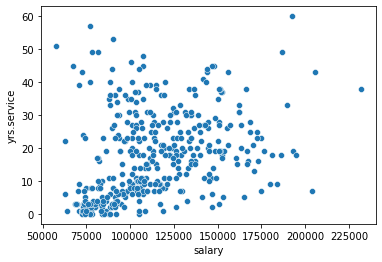

In [20]:
sns.scatterplot(y='yrs.service',x='salary',data=df)

<AxesSubplot:xlabel='salary', ylabel='rank'>

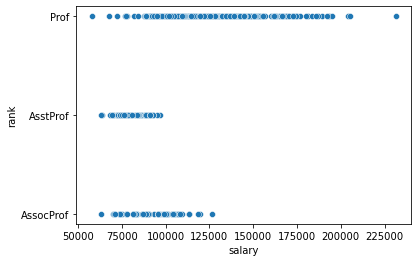

In [21]:
sns.scatterplot(y='rank',x='salary',data=df)

from above graph we see that 
1.professor has salary in the range 65000 to 200000
2.asst prof has 65000 to 100000
3.Assoc prof has in range of 700000 to 110000

<AxesSubplot:xlabel='salary', ylabel='sex'>

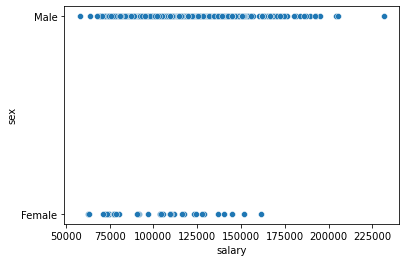

In [22]:
sns.scatterplot(y='sex',x='salary',data=df)

we can see that salary for male is eqaully distributed in range of 65000 to 200000

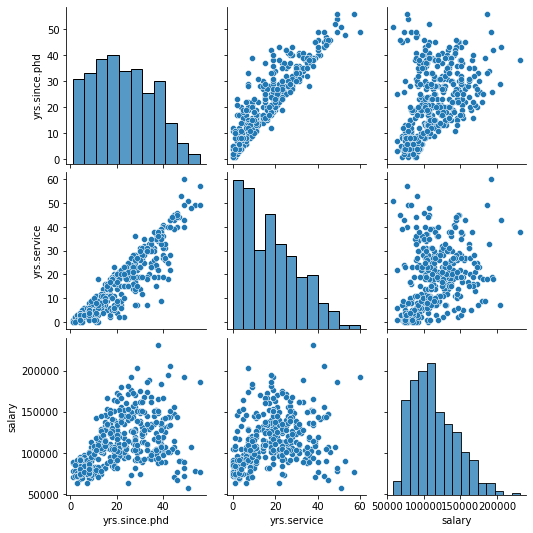

In [23]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

# Correlation

In [24]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [25]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

correlation using heatmap

<AxesSubplot:>

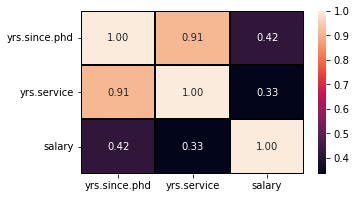

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),annot=True,linewidths=0.3,linecolor='black',fmt='.2f')

1.yrs.service  has 33 percent correlation with target variable which can be considered as good bond
2.yrs.since.Phd  has 42 percent correlation with target variable which can be considered as strong bond

# Descriptive statistics

In [28]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


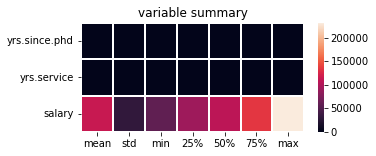

In [43]:
plt.figure(figsize=(5,2))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=False,fmt='.2f')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('variable summary')
plt.savefig('heatmap.png')
plt.show()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# outliers checking

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
collist=df.columns.values
ncol=30
nrows=5

In [57]:
collist

array(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex',
       'salary'], dtype=object)

In [66]:
for i in range(2,len(collist)):
    print(collist[i])
    break

yrs.since.phd


In [67]:
df[collist[2]]

0      19
1      20
2       4
3      45
4      40
       ..
392    33
393    31
394    42
395    25
396     8
Name: yrs.since.phd, Length: 397, dtype: int64

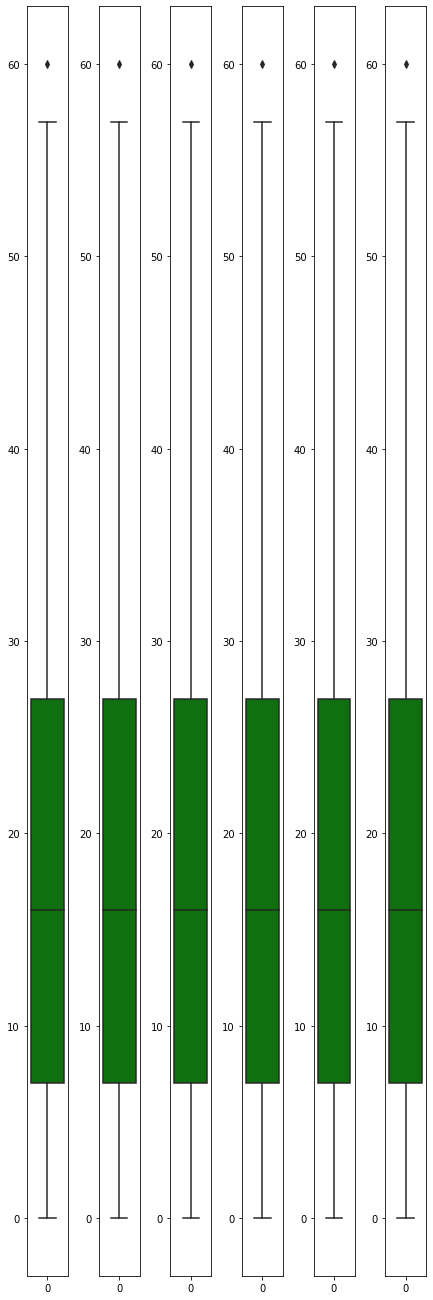

In [82]:
import seaborn as sns
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[3]],color="green",orient='v')
    plt.tight_layout()

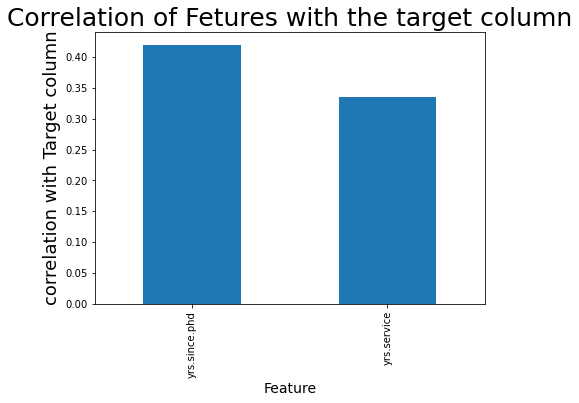

In [97]:
plt.figure(figsize=(7,5))
df.corr()["salary"].sort_values(ascending=False).drop(["salary"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

In [93]:
print("KEY OBSERVTIONS:\n\n",df.corr()["salary"].sort_values(ascending=False).drop(["salary"]))

KEY OBSERVTIONS:

 yrs.since.phd    0.419231
yrs.service      0.334745
Name: salary, dtype: float64


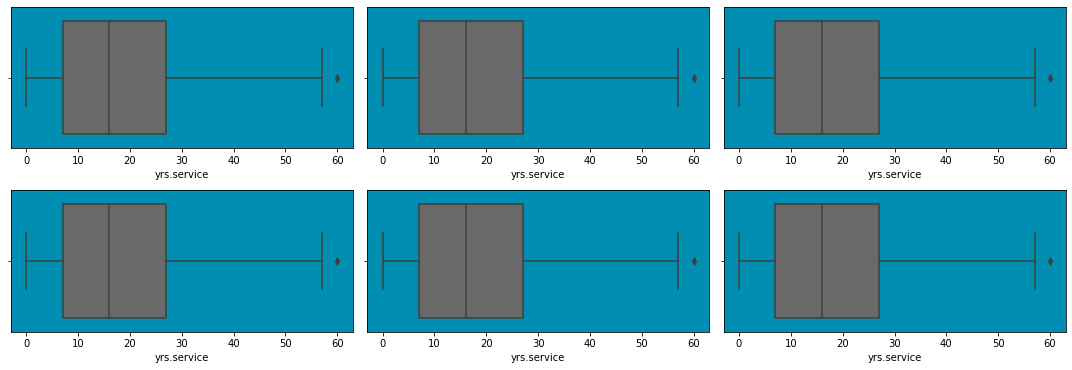

In [110]:
plt.figure(figsize=(15,15))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(6,3,i+1)
    ax=sns.boxplot(df[collist[3]], color = "#696969" , orient = "h")
    ax.set_facecolor("#008fb3")
    plt.tight_layout()